# Incertitudes et loi de réfraction

Pour déterminer l'indice d'un matériau, on peut étudier expérimentalement la déviation d'un faisceau lumineux par celui-ci. Cette déviation est mesurée en TP avec un rapporteur, qui est gradué tous les degrés. On propose d'évaluer l'incertitude de mesure sur l'indice pour une lecture au rapporteur. On utilisera la figure ci-dessous. 

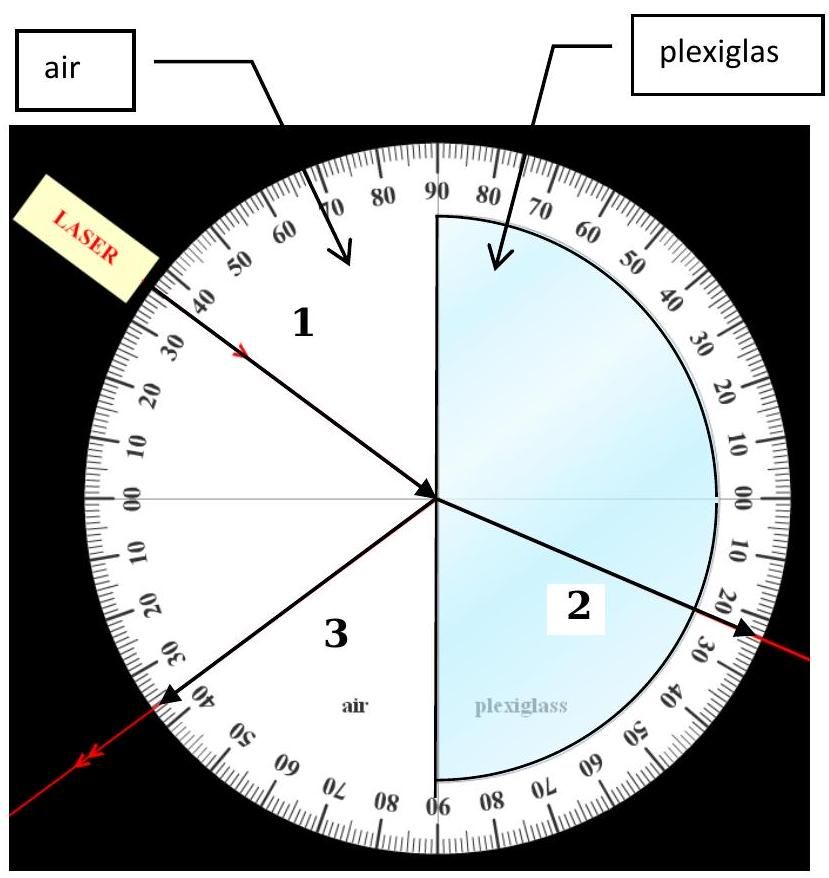

## Estimer l'erreur commise sur la valeur de l'angle 

L'incertitude associée au rapporteur est de type B. Comme pour la règle, cette incertitude vaut environ une demie-graduation (une graduation divisée par la racine carré de 12 pour être exacte). Derrière cette valeur se cache un calcul, celui de l'écart-type d'une série d'observations équitablement réparties sur une graduation. 

Utilisons la bibliotèque random de numpy pour générer des valeurs aléatoires qui vont permètre de simuler des lectures d'angles. Testons la loi

In [1]:
import numpy.random as rd

tableau = rd.uniform(35.5,36.5,10) # génère 10 valeurs aléatoires réparties de manière équiprobables sur l'interval [35.5,36.5[

print(tableau)

[35.50235542 35.60616455 35.7217817  36.47481322 36.4880377  35.58860581
 35.82734479 36.44062543 35.75889298 35.8957851 ]


Visualisons le résultat sous forme d'histogramme 

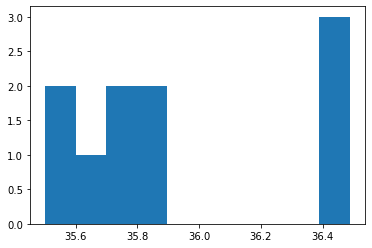

In [2]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.hist(tableau)
plt.show()

Avec cette commande, il est possible de simuler un grand nombre d'observations pour obtenir une moyenne et un écart-type. Cela permettra de calculer l'incertitude sans avoir à appliquer de formules. 

Commençons par les angles. Sur la figure on peut lire la valeur de l'angle d'incidence `i1` à 36° et l'angle de réfraction `i2` à 23°. Nous allons déterminer l'incertitude liée au matériel utilisé, le rapporteur. Commençons d'abord par générer des observations des deux angles centrées autour des valeurs 35° et 23° puis traçons un histogramme des valeurs obtenues.

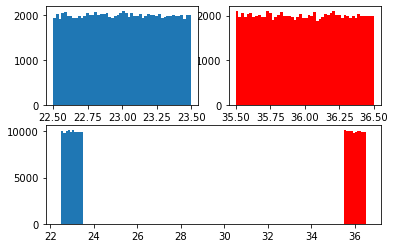

In [3]:
i1 = rd.uniform(35.5,36.5,100000) # liste des angles i1 (en degrés) centrés sur 35°
i2 = rd.uniform(22.5,23.5,100000) # liste des angles i2 (en degrés) centrés sur 23°

plt.figure(2)
plt.subplot(212)
plt.hist(i1,color = 'r')
plt.hist(i2)
plt.subplot(222)
plt.hist(i1,bins=50,color = 'r')
plt.subplot(221)
plt.hist(i2,bins=50)
plt.show()

Le code précédent génère 100000 observations équiprobables dans un interval donné pour chaque angle. La distribution est dite "distribution carré" (ou "distribution uniforme") du fait de l'aspect rectangulaire visible ci-dessus. On peut obtenir la valeur moyenne et l'écart-type de chaque mesure simulée avec le code suivant.

In [4]:
import numpy as np

print("Moyenne de la liste des i1 : {:.2f}° ; Ecart-type sur de la liste des i1 : {:.2f}°".format(np.mean(i1),np.std(i1,ddof=1)))
print("Moyenne de la liste des i2 : {:.2f}° ; Ecart-type sur de la liste des i2 : {:.2f}°".format(np.mean(i2),np.std(i2,ddof=1)))

Moyenne de la liste des i1 : 36.00° ; Ecart-type sur de la liste des i1 : 0.29°
Moyenne de la liste des i2 : 23.00° ; Ecart-type sur de la liste des i2 : 0.29°


Un écart-type qui vaut bien $\dfrac{\rm 1~graduation}{\sqrt{12}}$ degrés comme annoncé dans l'introduction. On peut s'en convaincre :

In [12]:
print("{:.2f}".format(1/np.sqrt(12)))

0.29


L'intérêt de cette méthode est de se passer de formules théoriques sur les incertitudes pour ne faire que des calculs simples (moyenne et écart type) sur des observations simulées.

Remarque : l'incertitude élargie vaut deux fois cet écart-type, proche de la demi-graduation (en faisant $0,58° \simeq 0,5°$) ce qui semble avoir été annoncé plus haut. Est-ce que cela veut dire que le résultat $i_2 = 36°$ par exemple serait compris entre $35,4°$ et $36,6°$ à 95% de confiance ? La notion d'incertitude élargie est reliée à un intervalle de confiance et à une distribution de probabilité particulière, la distribution gaussienne. Ce n'est pas le cas ici car 100% des valeurs sont dans l'intervalle $[35,5°;36,5°[$ par construction (c'est ce que renvoie la commande `rd.uniform(35.5,36.5,100000)`). Parler d'incertitude élargie n'a donc pas vraiment de sens ici. Pour bien faire, il faudrait préciser à chaque fois la distribution menant à l'incertitude-type : c'est une tache hors programme.  

## Incertitudes sur la valeur de l'indice

La valeur de l'indice du plexiglass $n_2$ (`n2`en code) vérifie :

$n_2 = \dfrac{n_1 \sin(i_1)}{\sin(i_2)}$,

avec $n_1$ l'indice de l'air proposé à 1,0003. 

Pour déterminer la valeur de $n_2$ et $u(n_2)$ numériquement, il suffit de calculer la valeur moyenne et l'écart-type du terme de droite.

In [6]:
n1 = 1.0003
n2 = n1*np.sin(i1*np.pi/180)/np.sin(i2*np.pi/180) # ensemble des valeurs possibles de n2. Convertir les degrés en radians !
print("Moyenne de la liste des n2 : {:.4g} ; Ecart-type sur de la liste des n2 : {:.2g}".format(np.mean(n2),np.std(n2,ddof=1)))

Moyenne de la liste des n2 : 1.505 ; Ecart-type sur de la liste des n2 : 0.021


Regardons visuellement l'ensemble des valeurs possibles pour n_2 sous forme d'histogramme : 

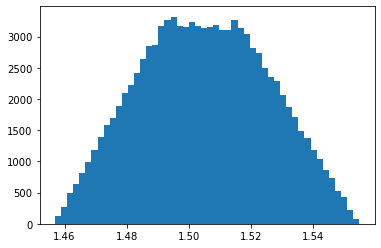

In [7]:
plt.figure(3)
plt.hist(n2,bins=50)
plt.show()

La distribution n'est ni uniforme ni gaussienne. L'écart-type est simple à calculer même si nous ne connaissons pas cette distribution.



Théoriquement, pour avoir l'incertitude sur n_2, il faudrait calculer, pour $n_2 = f(i_1,i_2)$ :

$u(n_2) = \sqrt{\left(\dfrac{\partial f}{\partial i_1}\right)^2u(i_1)^2 + \left(\dfrac{\partial f}{\partial i_2}\right)^2u(i_2)^2}$
 $= n_2 \sqrt{\left(\dfrac{1}{\tan(i_1)}\right)^2u(i_1)^2 + \left(\dfrac{1}{\tan(i_2)}\right)^2u(i_2)^2} $
 
L'expression suppose que $i_1$ et $i_2$ soient indépendants, ce que l'on peut remettre en question, toutefois la même hypothèse est utilisée pour obtenir les valeurs de $n_2$ par tirage aléatoire. Les deux calculs doivent donc mener aux mêmes résultats, le code suivant permet de s'en convaincre : 

In [8]:
n2t = n1*np.sin(36*np.pi/180)/np.sin(23*np.pi/180)
un2t = n2t*np.sqrt((1/np.tan(36*np.pi/180))**2*(np.pi/180)**2/12 + (1/np.tan(23*np.pi/180))**2*(np.pi/180)**2/12)
print("Valeur de n2 : {:.4g} ; Incertitude type sur n2 : {:.2g}".format(n2t,un2t))

Valeur de n2 : 1.505 ; Incertitude type sur n2 : 0.021
